In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./data/dataset.csv")

In [4]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.shape

(12316, 32)

In [6]:
df.describe() # output: numerical_values

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [7]:
# check for count of missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
# Exploratory Data Analysis
df.duplicated().sum()

0

In [9]:
df["Accident_severity"].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident severity')

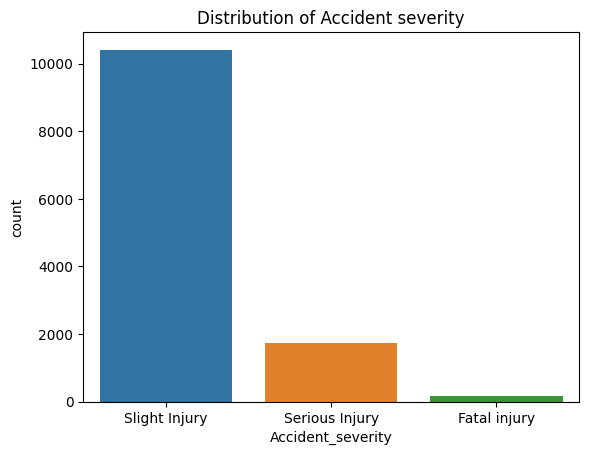

In [10]:
sns.countplot(x = df["Accident_severity"])
plt.title("Distribution of Accident severity")

In [11]:
# check of missing values
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [12]:
# removing the labels which have more than 2000
# missing values
df.drop(['Service_year_of_vehicle', 'Defect_of_vehicle',
         'Work_of_casuality', 'Fitness_of_casuality',
         'Time'], axis=1, inplace=True)

In [13]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [14]:
categorical_values = [x for x in df.columns if df[x].dtype == 'O']

In [15]:
for i in categorical_values:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [16]:
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [17]:
# from the above info we can see all the missing
# values are handled which are replaced by the mode

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

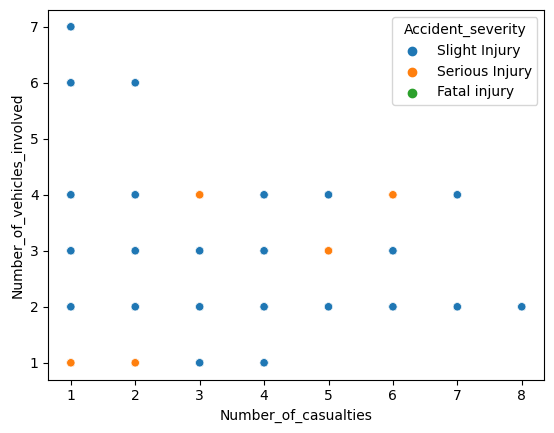

In [18]:
# relationship between Number_of_casualties and Number_of_vehicles_involved
sns.scatterplot(x = df["Number_of_casualties"],
                y = df['Number_of_vehicles_involved'],
                hue = df['Accident_severity'])

In [19]:
# finding the correlation of numerical labels
df.corr(numeric_only=True) # deperacted
# instead use - df.corr(numeric_only=True)

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


In [20]:
numerical_values = [i for i in df.columns if df[i].dtype != 'O']

In [21]:
numerical_values

['Number_of_vehicles_involved', 'Number_of_casualties']

In [22]:
# histogram for numerical labels

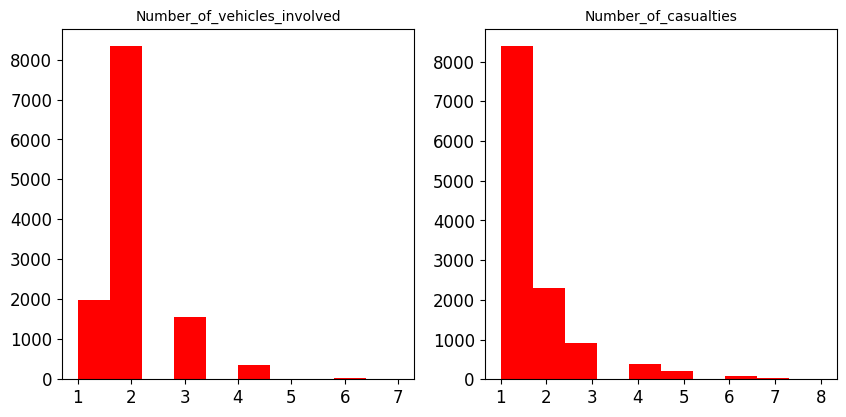

In [23]:
plt.figure(figsize=(10, 10))
plot = 1
for i in numerical_values:
    if plot <= df.shape[1]:
        ax1 = plt.subplot(2, 2, plot)
        plt.hist(df[i], color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(i, fontsize=10)
    plot += 1

In [24]:
# handling categorical values
df.dtypes

Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Pedestrian_movement            object
Cause_of_accident              object
Accident_sev

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df1 = pd.DataFrame()

for i in categorical_values:
    if i != 'Accident_severity':
        df1[i] = LE.fit_transform(df[i])

In [26]:
df1.head()
file_name = 'encoded_data.xlsx'
df1.to_excel(file_name)

In [27]:
from sklearn.feature_selection import chi2
fp_values = chi2(df1, df['Accident_severity'])

In [28]:
print(fp_values)

(array([ 0.15822071,  8.91539214,  0.1431894 ,  0.17458477,  5.34534549,
        4.49967858,  1.07767124,  1.10426215,  3.61654037,  3.28161464,
        0.1319306 ,  3.08648691,  6.99480557,  0.61510308, 16.08282359,
        1.14934538, 10.09632283,  2.20071197,  3.2168602 ,  0.12594479,
       13.77841337,  0.20273788,  0.39747982,  3.19366551]), array([9.23937958e-01, 1.15890328e-02, 9.30908116e-01, 9.16409114e-01,
       6.90673790e-02, 1.05416165e-01, 5.83427189e-01, 5.75721597e-01,
       1.63937473e-01, 1.93823502e-01, 9.36163348e-01, 2.13686893e-01,
       3.02759144e-02, 7.35244973e-01, 3.21854237e-04, 5.62889079e-01,
       6.42112839e-03, 3.32752607e-01, 2.00201664e-01, 9.38969394e-01,
       1.01872169e-03, 9.03599597e-01, 8.19763078e-01, 2.02536988e-01]))


In [29]:
fp_values_1 = pd.DataFrame({'features': df1.columns,
                            'Fscore': fp_values[0],
                            'Pvalues': fp_values[1]})

In [30]:
print(fp_values_1)

                   features     Fscore   Pvalues
0               Day_of_week   0.158221  0.923938
1        Age_band_of_driver   8.915392  0.011589
2             Sex_of_driver   0.143189  0.930908
3         Educational_level   0.174585  0.916409
4   Vehicle_driver_relation   5.345345  0.069067
5        Driving_experience   4.499679  0.105416
6           Type_of_vehicle   1.077671  0.583427
7          Owner_of_vehicle   1.104262  0.575722
8     Area_accident_occured   3.616540  0.163937
9          Lanes_or_Medians   3.281615  0.193824
10          Road_allignment   0.131931  0.936163
11        Types_of_Junction   3.086487  0.213687
12        Road_surface_type   6.994806  0.030276
13  Road_surface_conditions   0.615103  0.735245
14         Light_conditions  16.082824  0.000322
15       Weather_conditions   1.149345  0.562889
16        Type_of_collision  10.096323  0.006421
17         Vehicle_movement   2.200712  0.332753
18           Casualty_class   3.216860  0.200202
19          Sex_of_c

In [31]:
# sorting about lower p-value in the encoded dataset.
# lower p-value indicates a higher relationship
#   between variables in the dataset

fp_values_1.sort_values(by = 'Pvalues', ascending=True)

,features,Fscore,Pvalues
14,Light_conditions,16.082824,0.000322
20,Age_band_of_casualty,13.778413,0.001019
16,Type_of_collision,10.096323,0.006421
1,Age_band_of_driver,8.915392,0.011589
12,Road_surface_type,6.994806,0.030276
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824
18,Casualty_class,3.216860,0.200202


In [32]:
df2 = df.drop(['Owner_of_vehicle', 'Type_of_vehicle',
               'Road_surface_conditions', 'Pedestrian_movement',
               'Casualty_severity', 'Educational_level',
               'Day_of_week', 'Sex_of_driver', 'Road_allignment',
               'Sex_of_casualty'], axis=1)

In [33]:
# updating categorical values according to sorted
# encoded data on the basis of p-value
categorical_values_new = [i for i in 
                          df2.columns if
                          df2[i].dtype == 'O']

In [34]:
dummy_vars = pd.get_dummies(df2[['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
                          'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 
                          'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 
                          'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident']],drop_first=True)

In [35]:
dummy_vars.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [36]:
df3 = pd.concat([df2, dummy_vars], axis=1)
df3.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,...,False,False,False,False,False,False,False,False,False,False
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,False,False,False,False,False,False,True,False,False,False
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,...,False,False,False,False,False,False,False,False,False,False
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,False,False,False,False,False,False,False,False,False,False
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,False,False,False,False,False,False,True,False,False,False


In [37]:
df3.drop(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',   
          'Area_accident_occured', 'Lanes_or_Medians',
          'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
          'Vehicle_movement','Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident'],axis=1,inplace=True)

In [38]:
df3.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,Slight Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2,Slight Injury,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,2,Serious Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2,Slight Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2,Slight Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [39]:
x = df3.drop(['Accident_severity'], axis=1)

In [40]:
y = df3.iloc[:, 2]

In [41]:
y.value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

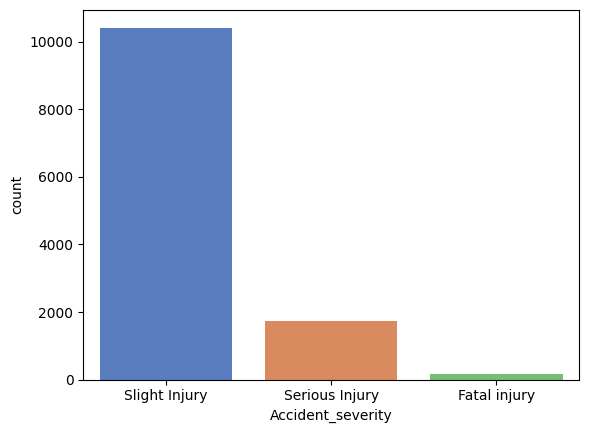

In [42]:
sns.countplot(x = y, palette='muted')

In [43]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
_x, _y = oversample.fit_resample(x, y)

In [44]:
y1 = pd.DataFrame(_y)
y1.value_counts() # data is balanced

Accident_severity
Fatal injury         10415
Serious Injury       10415
Slight Injury        10415
Name: count, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

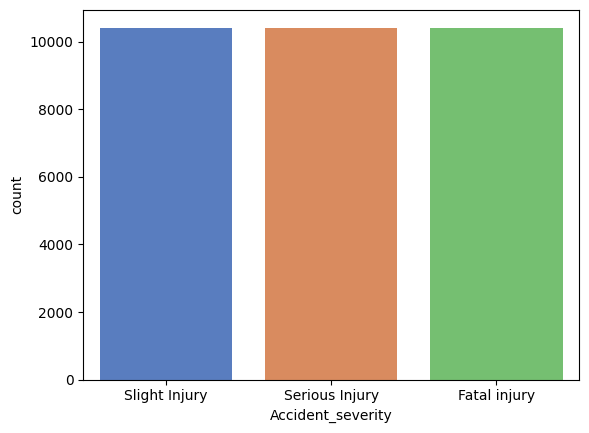

In [45]:
sns.countplot(x = _y, palette='muted')

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    _x, _y, test_size=0.3, random_state=42
)

In [47]:
print(xtrain.shape, xtest.shape, 
      ytrain.shape, ytest.shape)

(21871, 104) (9374, 104) (21871,) (9374,)


### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
mknn = KNeighborsClassifier(n_neighbors=5)
mknn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [49]:
yknn = mknn.predict(xtest)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [51]:
mat_knn = confusion_matrix(ytest, yknn)
print(mat_knn)

[[3124    2    0]
 [ 291 2823   30]
 [ 544 1619  941]]


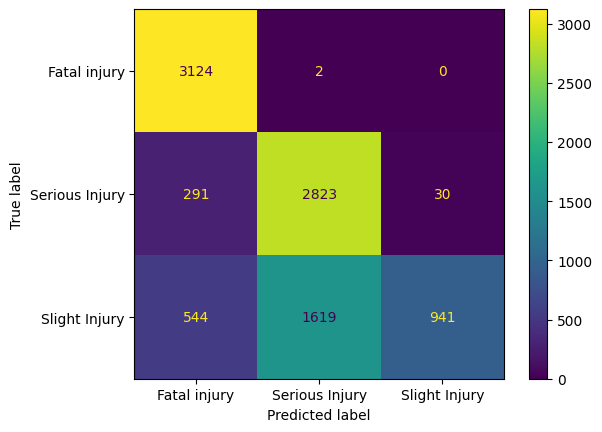

In [52]:
print(ConfusionMatrixDisplay.from_predictions(
    ytest, yknn
))

In [53]:
acc_knn = accuracy_score(ytest, yknn)
print(f"accuracy_score_knn = {acc_knn:.2f}%\n")

report_knn = classification_report(ytest, yknn)
print(report_knn)

accuracy_score_knn = 0.73%

                precision    recall  f1-score   support

  Fatal injury       0.79      1.00      0.88      3126
Serious Injury       0.64      0.90      0.74      3144
 Slight Injury       0.97      0.30      0.46      3104

      accuracy                           0.73      9374
     macro avg       0.80      0.73      0.70      9374
  weighted avg       0.80      0.73      0.70      9374



### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
mdec = DecisionTreeClassifier(criterion='entropy')
mdec.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [55]:
ydec = mdec.predict(xtest)

In [56]:
mat_dec = confusion_matrix(ytest, ydec)
print(mat_dec)

[[3101    9   16]
 [  73 2645  426]
 [  85  809 2210]]


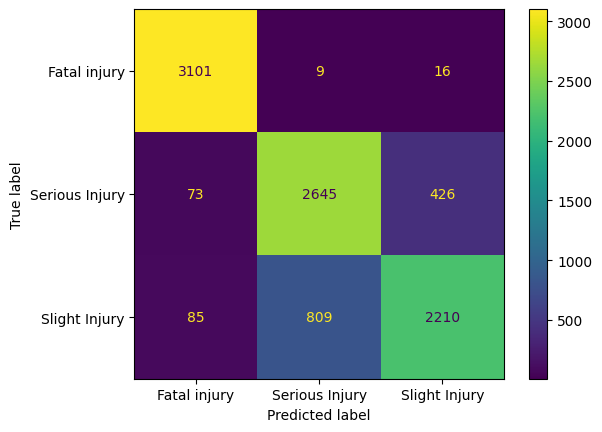

In [57]:
print(ConfusionMatrixDisplay.from_predictions(ytest, ydec))

In [58]:
acc_dec = accuracy_score(ytest, ydec)
print(f"accuracy_score_decisiontree = {acc_dec:.2f}%\n")

report_dec = classification_report(ytest, ydec)
print(report_dec)

accuracy_score_decisiontree = 0.85%

                precision    recall  f1-score   support

  Fatal injury       0.95      0.99      0.97      3126
Serious Injury       0.76      0.84      0.80      3144
 Slight Injury       0.83      0.71      0.77      3104

      accuracy                           0.85      9374
     macro avg       0.85      0.85      0.85      9374
  weighted avg       0.85      0.85      0.85      9374



### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
mran = RandomForestClassifier(n_estimators=25,
                              criterion='entropy')
mran.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [60]:
yran = mran.predict(xtest)

In [61]:
mat_raf = confusion_matrix(ytest, yran)
print(mat_raf)

[[3104    5   17]
 [  34 2809  301]
 [  19  528 2557]]


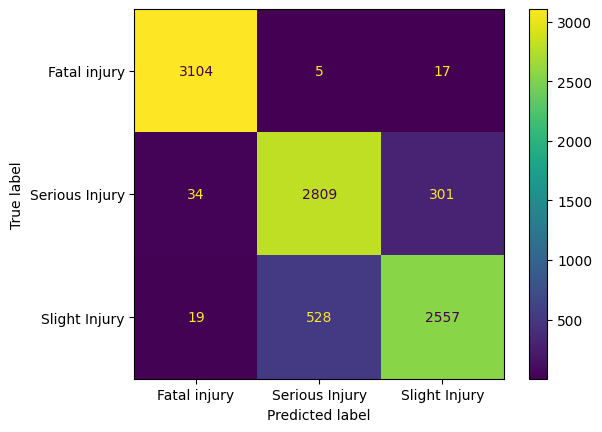

In [62]:
print(ConfusionMatrixDisplay.from_predictions(
    ytest, yran
))

In [63]:
acc_raf = accuracy_score(ytest, yran)
print(f"accuracy_score_randomforest = {acc_raf:.2f}%\n")

report_raf = classification_report(ytest, yran)
print(report_raf)

accuracy_score_randomforest = 0.90%

                precision    recall  f1-score   support

  Fatal injury       0.98      0.99      0.99      3126
Serious Injury       0.84      0.89      0.87      3144
 Slight Injury       0.89      0.82      0.86      3104

      accuracy                           0.90      9374
     macro avg       0.90      0.90      0.90      9374
  weighted avg       0.90      0.90      0.90      9374



### SVM

In [64]:
from sklearn.svm import SVC
msvc = SVC()
msvc.fit(xtrain, ytrain)

SVC()

In [65]:
ysvc = msvc.predict(xtest)

In [66]:
mat_svc = confusion_matrix(ytest, ysvc)
print(mat_svc)

[[2996   92   38]
 [ 263 2319  562]
 [  14  245 2845]]


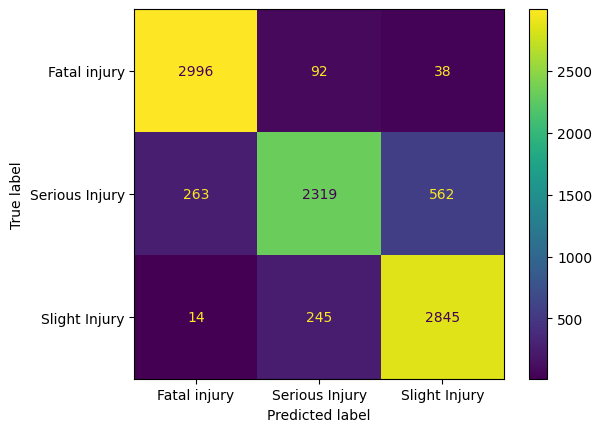

In [67]:
svc_cm = ConfusionMatrixDisplay.from_predictions(
    ytest, ysvc
)
print(svc_cm)

In [68]:
acc_svc = accuracy_score(ytest, ysvc)
print(f"accuracy_score_svc = {acc_svc:.2f}%\n")

report_svc = classification_report(ytest, ysvc)
print(report_svc)

accuracy_score_svc = 0.87%

                precision    recall  f1-score   support

  Fatal injury       0.92      0.96      0.94      3126
Serious Injury       0.87      0.74      0.80      3144
 Slight Injury       0.83      0.92      0.87      3104

      accuracy                           0.87      9374
     macro avg       0.87      0.87      0.87      9374
  weighted avg       0.87      0.87      0.87      9374



### Logistic Regression

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(xtrain)
x_test = sc.fit_transform(xtest)

In [70]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=42)

In [71]:
classifier.predict(sc.transform(xtrain))

array(['Fatal injury', 'Fatal injury', 'Fatal injury', ...,
       'Slight Injury', 'Fatal injury', 'Fatal injury'], dtype=object)

In [72]:
ypred = classifier.predict(xtest)

In [73]:
mat_lr = confusion_matrix(ytest, ypred)
print(mat_lr)

[[2632  442   52]
 [ 648 1911  585]
 [  30  315 2759]]


In [74]:
acc_lr = accuracy_score(ytest, ypred)
print(f"accuracy_score_lr = {acc_lr:.2f}%\n")

report_lr = classification_report(ytest, ypred, zero_division=1)
print(report_lr)

accuracy_score_lr = 0.78%

                precision    recall  f1-score   support

  Fatal injury       0.80      0.84      0.82      3126
Serious Injury       0.72      0.61      0.66      3144
 Slight Injury       0.81      0.89      0.85      3104

      accuracy                           0.78      9374
     macro avg       0.77      0.78      0.77      9374
  weighted avg       0.77      0.78      0.77      9374



## Comparative Analysis of Machine Learning models

In [82]:
# comparing accuracy score of the models
# algorithm used in a list
algorithm_used = ['KNN', 'DEC_TREE', 'RAN_FOR', 'SVC', 'LR']
accuracy_score_of_models = [acc_knn, acc_dec, acc_raf, acc_svc, acc_lr]

# creating a new dataframe of accuracy scores of the respective models
_accuracy_sc_t = pd.DataFrame(
    {'algorithms': algorithm_used, 'accuracy': accuracy_score_of_models}
)

_accuracy_sc_t['accuracy'] = _accuracy_sc_t['accuracy'] * 100 # formatting
print(_accuracy_sc_t)

  algorithms   accuracy
0        KNN  73.479838
1   DEC_TREE  84.873053
2    RAN_FOR  90.356305
3        SVC  87.049285
4         LR  77.896309


In [83]:
# sorting the accuracy score table
sorted_acc_values = _accuracy_sc_t.sort_values(by = 'accuracy', ascending=True)

# in order to create a analysis from the higher to lower accurate models

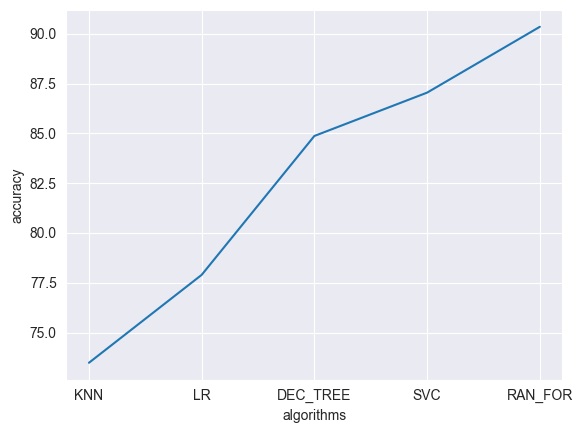

In [104]:
sns.lineplot(x = 'algorithms', y = 'accuracy',
                                    palette='muted', data=sorted_acc_values,
                                    markers=False)
sns.set_style("darkgrid")
plt.savefig('./results/comparative-analysis_LP', dpi=1200)
plt.show()

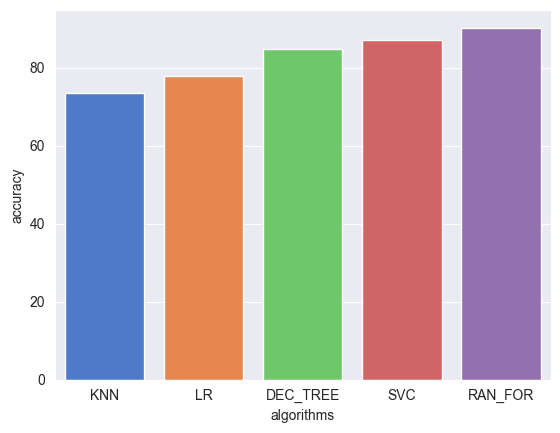

In [103]:
sns.barplot(x = 'algorithms', y = 'accuracy',
            palette='muted', data=sorted_acc_values, errwidth=0,
            saturation=0.9)

sns.set_style('darkgrid')
plt.savefig('./results/comparative-analysis_BG', dpi=1200)
plt.show()